<a href="https://colab.research.google.com/github/Abdelhamid-Khaled/Diamond/blob/main/Diamonds_Prediction_Using_LR_and_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. In this study, I will compare between Linear Regression Model and Neural Networks Model to predict the price of Diamonds based on all the following features.

### Content

**price** price in US dollars (\\$326--\\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)



# Importing Data

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loding the csv file as pandas dataframe
diamonds = pd.read_csv('/content/diamonds_price.csv')

In [3]:
# Looking at the loaded data
diamonds.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [4]:
# dropping the first column
diamonds = diamonds.drop(diamonds.columns[0],1)
# code to directly delete first column, while loding the data from csv file
# diamonds = pd.read_csv('G:\My Research\CSV Files\diamonds.csv').iloc[:,1:]

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# checking the datatypes and null values in the data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**From the above, we can see that there are no null values in our dataset.**

#Cleaning Data

In [7]:
# if there are null values presents in the data, then we can use imputer for filling those null values
# from sklearn.preprocessing import Imputer

In [8]:
# defining the variables into Categorical and Numerical

**Categorical Variables :** cut, color, clarity
**Numerical Variables :** carat, depth, table, price, x, y, z

In [9]:
# defining the variables into Dependent and Independent

In [10]:
# Now we will see the distribution of variables
d_cat = diamonds[['cut', 'color', 'clarity']]
d_num = diamonds[[ 'carat','depth', 'table', 'price', 'x', 'y', 'z']]

In [11]:
d_num.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


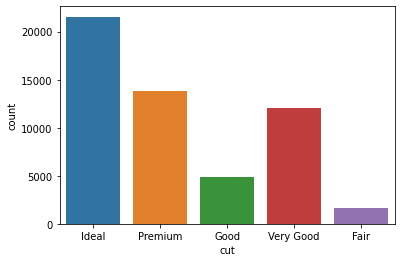

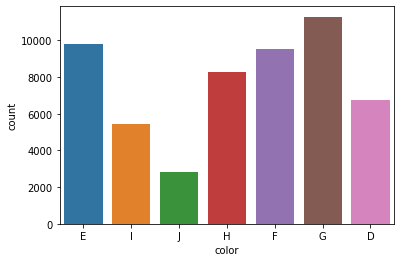

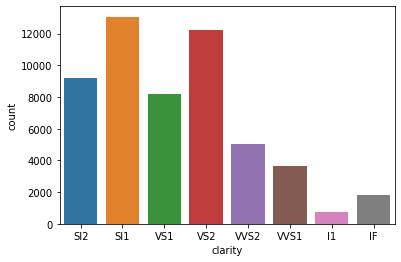

In [12]:
for i in d_cat:
    sns.countplot(x=i, data=d_cat)
    plt.show()

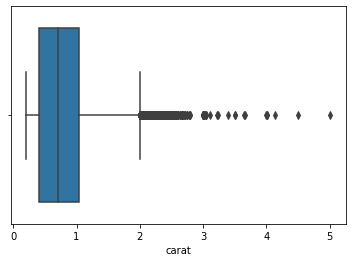

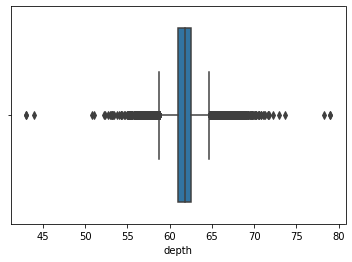

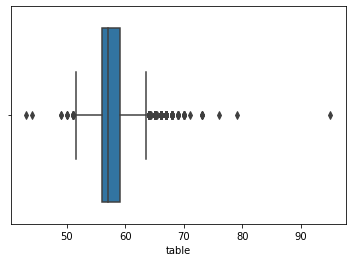

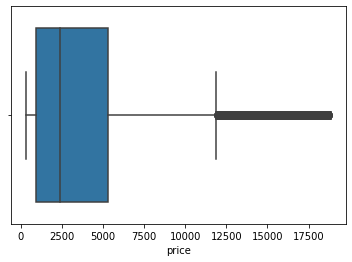

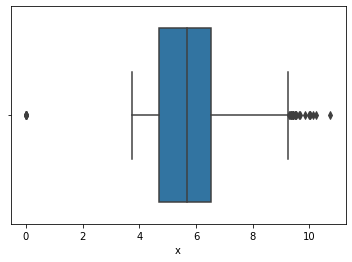

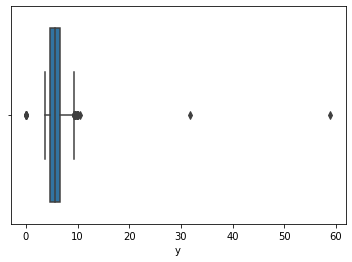

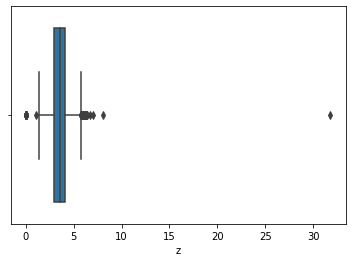

In [13]:
for i in d_num:
    sns.boxplot(x=i, data=d_num)
    plt.show()

From the above graph we can see that there are many outliers present in our data, thus outlier treatment is necessary,
but here, the target variable is Price and as we are predicting price of diamonds, then extreme values are possible, depending about the dimentions of the diamonds.

In [14]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

# Encoding categorical variables using LabelEncoder

In [15]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])

In [16]:
diamonds.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [17]:
diamonds = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table','x','y','z','price']]
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335


#Splitting the data into train and test

In [18]:
# Splitting the data into dependent and independent variables
X=diamonds.drop('price', 1)
y=diamonds['price']
    
# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

X_train size : (37758, 9)
X_test size : (16182, 9)
y_train size : (37758,)
y_test size : (16182,)


**Feature Scaling** To scale the independent features so that all the values can be in a comparable range

In [19]:
X_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.00000
mean,0.798215,2.556862,2.591663,3.837094,61.741901,57.454974,5.729500,5.733609,3.53770
std,0.477678,1.024961,1.701094,1.722390,1.433101,2.232344,1.128579,1.160468,0.71396
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,0.000000,0.000000,0.00000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.91000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.52000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.04000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.80000


#Scaling Data

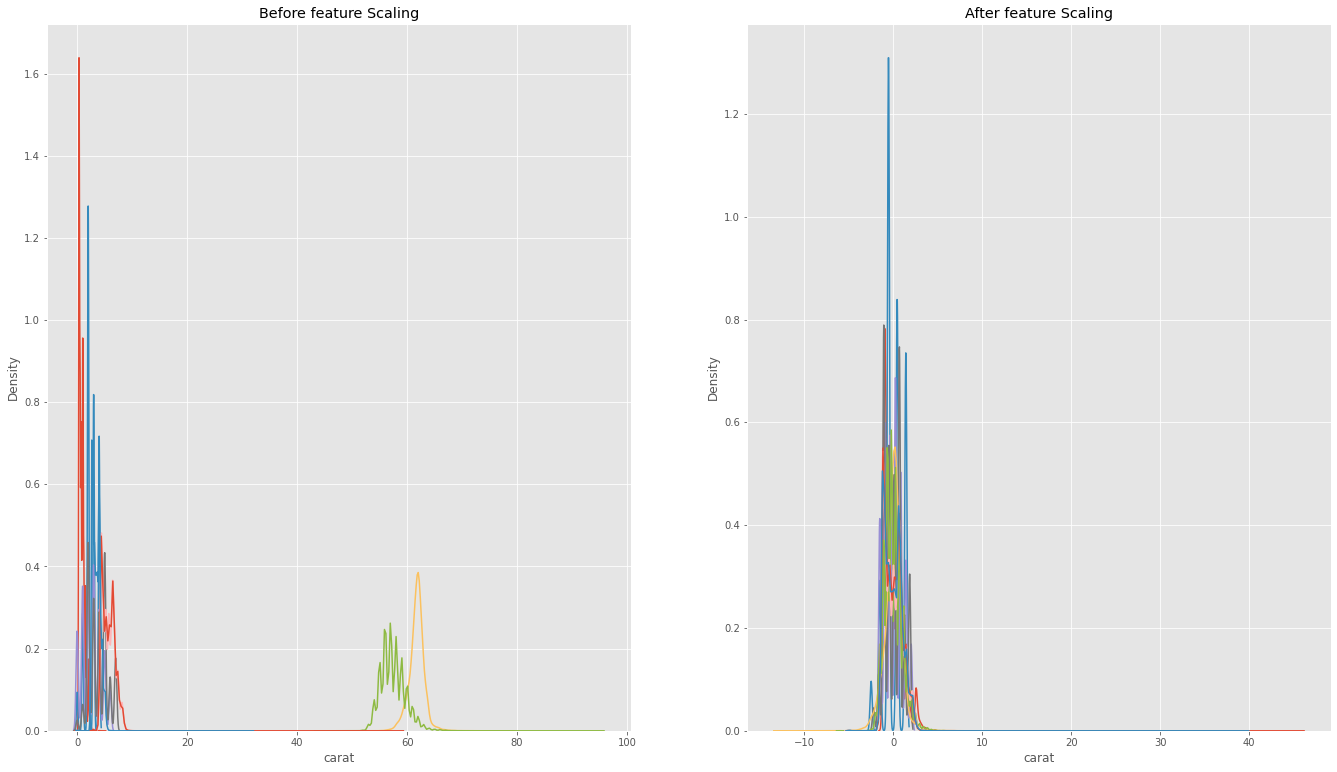

In [20]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
    
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_df, columns=X_train.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,13))

ax1.set_title('Before feature Scaling')
for i in X_train:
        sns.kdeplot(X_train[i], ax=ax1)
                    
ax2.set_title('After feature Scaling')
for i in scaled_df:
    sns.kdeplot(scaled_df[i], ax=ax2)
    
plt.show()

**Now we can see that the values of all independent variables lie in a comparable range**

# Linear Regression Model

**Now our data is ready to fit into regression model**

In [21]:
# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')
lin_score=lin_reg.score(X_test, y_test)



    
  
    
#prediction(data=diamonds, target_variable='price', split_size=0.3)

R^2 score for Train using sklearn: 0.8838780842365068
R^2 score for Test using sklearn: 0.8878187588744918


#Predicting Diamond Prices using Neural Networks

In [22]:
# Import required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# Create an MLP regressor
nn = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000)

# Train the model
nn.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = nn.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9400376861070449


The architecture used is a single-hidden-layer MLP. The number of neurons in the hidden layer is specified with the hidden_layer_sizes parameter, which in this case is set to (50,). This means that the hidden layer has 50 neurons. The parameter max_iter is used to set the maximum number of iterations of the optimization algorithm, which in this case is set to 1000.

Multi-layer Perceptron (MLP) architecture, which is a type of feedforward artificial neural network. An MLP consists of an input layer, one or more hidden layers, and an output layer. The input layer receives the input features, which in this case is the numerical data of the diamonds. Each hidden layer applies a series of non-linear transformations to the input, allowing the network to learn complex relationships between the input and output. The output layer produces the final prediction, which in this case is the predicted price of the diamonds.

#Now, comparing the two modles

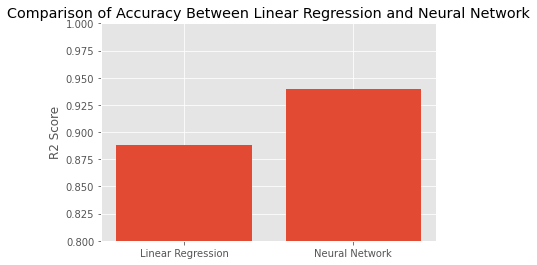

In [23]:
import matplotlib.pyplot as plt


# Create a bar chart
models = ['Linear Regression', 'Neural Network']
scores = [lin_score, r2]
x_pos = [0,1]

fig, ax = plt.subplots()
ax.bar(x_pos, scores, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.set_ylim([0.8, 1])
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of Accuracy Between Linear Regression and Neural Network')

# Show the plot
plt.show()

# Conclusion

In conclusion, the comparison between the linear regression model and the **neural network model**  shows that the neural network model is more **accurate** in predicting the outcome of the diamonds prices, as it **achieved a higher** R2 score of **0.9403680770506707** compared to the linear regression model which achieved a R2 score of **0.8878187588744918** This suggests that the neural network model was able to capture more complex relationships and patterns in the data, leading to a better prediction of the diamond prices. However, it's worth noting that the neural network model may be **more computationally** expensive and require more data to train, and it may be less interpretable than a linear regression model, which makes it easier to understand the relationship between the input variables and the output.